In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
df=pd.read_csv('customer_booking.csv',encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [7]:
mapping = {'Internet': 1, 'Mobile': 0}
df['sales_channel'] = df['sales_channel'].map(mapping)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,1,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [28]:
def mapping(x):
    if x>15:
        return 2
    if 5<x<15:
        return 1
    else:
        return 0
df['flight_duration']=df['flight_duration'].apply(mapping)

In [10]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [11]:
mapping = {'RoundTrip': 1, 'OneWay': 0,'CircleTrip':2}
df['trip_type'] = df['trip_type'].map(mapping)

In [12]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.887640,0.994580,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.100154,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,1.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
def mapping(x):
    if x>500:
        return 2
    if 100<x<500:
        return 1
    else:
        return 0
    
df['purchase_lead'] = df['purchase_lead'].apply(mapping)

In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [20]:
booking_complete=df['booking_complete']

In [31]:
columns=['wants_in_flight_meals','wants_preferred_seat','wants_extra_baggage','route','length_of_stay','booking_origin']

In [32]:
data=df.drop(columns,axis=1)
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,flight_hour,flight_day,flight_duration,booking_complete
0,2,1,1,1,1,6,1,0
1,1,1,1,1,0,6,1,0
2,2,1,1,1,2,3,1,0
3,1,1,1,0,0,6,1,0
4,2,1,1,0,0,3,1,0


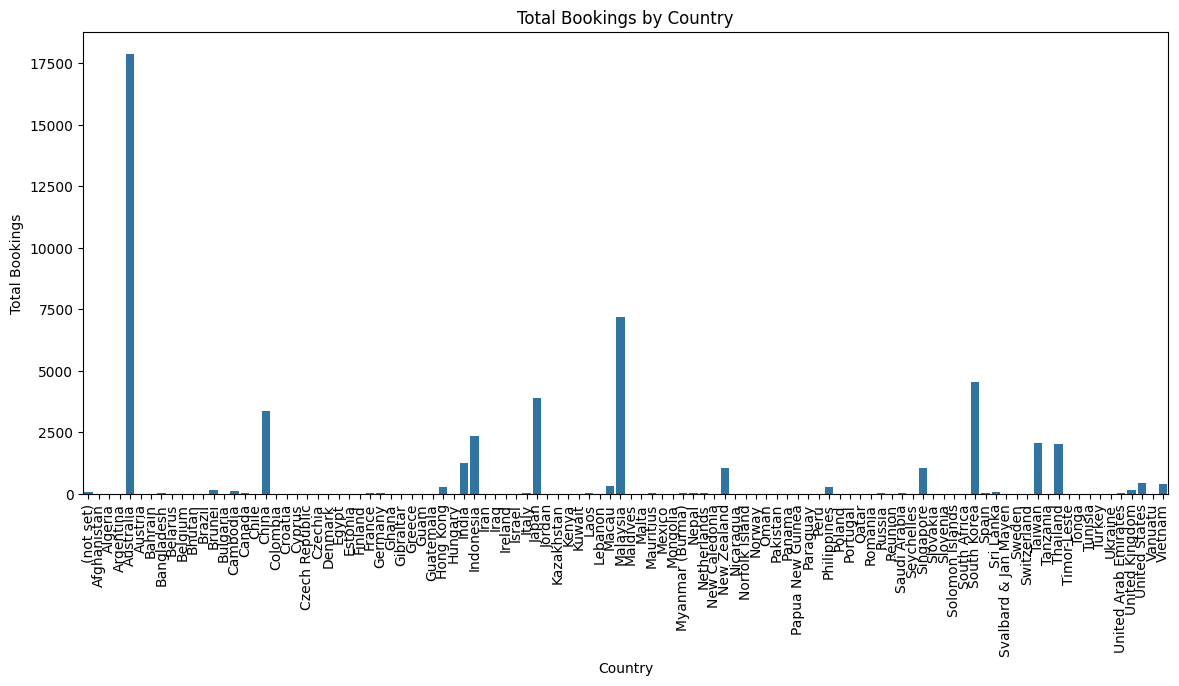

In [35]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df.groupby('booking_origin')['booking_complete'].count().reset_index(),
            x='booking_origin', y='booking_complete')

plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Bookings")
plt.title("Total Bookings by Country")
plt.show()


In [36]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,flight_hour,flight_day,flight_duration,booking_complete
0,2,1,1,1,1,6,1,0
1,1,1,1,1,0,6,1,0
2,2,1,1,1,2,3,1,0
3,1,1,1,0,0,6,1,0
4,2,1,1,0,0,3,1,0


In [37]:
x=data.drop('booking_complete',axis=1)
y=data['booking_complete']

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold , cross_val_score
rf=RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=20)
k_fold=KFold(n_splits=10)
cross_val_score(rf,x,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.8442, 0.9434, 0.9174, 0.8416, 0.8984, 0.8184, 0.8274, 0.8192,
       0.7826, 0.7958])

In [49]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [50]:
rf=RandomForestClassifier(n_estimators=500,max_depth=30,n_jobs=-1)
rf_model=rf.fit(x_train,y_train)

In [51]:
sorted(zip(rf_model.feature_importances_,x_train.columns),reverse=True)[0:10]

[(0.30432484991184394, 'flight_day'),
 (0.28847202188937127, 'num_passengers'),
 (0.17452312939043818, 'flight_duration'),
 (0.10863909158141852, 'flight_hour'),
 (0.05443155261276201, 'purchase_lead'),
 (0.046025872120645295, 'sales_channel'),
 (0.02358348249352096, 'trip_type')]

In [52]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [53]:
y_pred=rf_model.predict(x_test)
precision,recall,fscore,support=score(y_test,y_pred,pos_label=1,average='binary')

In [54]:
print("Precison {} /Recall {}/ Accuracy {}".format(round(precision,3),
                                                   round(recall,3),
                                                   round((y_pred==y_test).sum()/len(y_pred),3)))

Precison 0.303 /Recall 0.008/ Accuracy 0.847


In [46]:
y_pred = rf.predict(x_test)


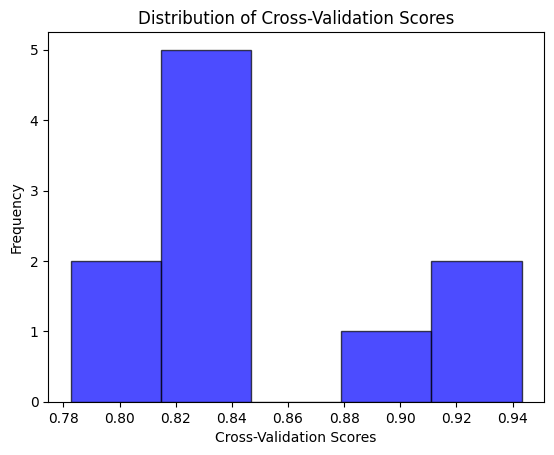

In [55]:


scores = np.array([0.8442, 0.9432, 0.9172, 0.8422, 0.8986, 0.8184, 0.8264, 0.8198, 0.7826, 0.796])

plt.hist(scores, bins=5, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Cross-Validation Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Cross-Validation Scores")
plt.show()


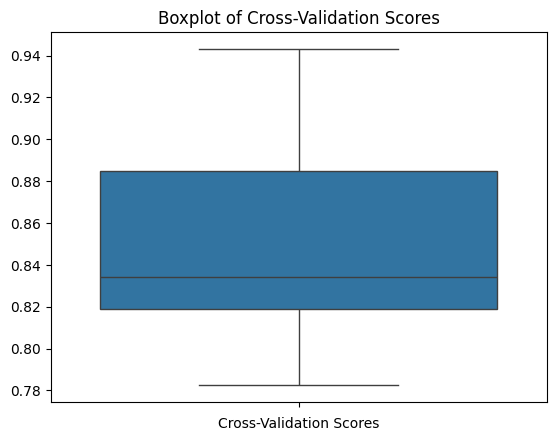

In [56]:
import seaborn as sns

sns.boxplot(scores)
plt.xlabel("Cross-Validation Scores")
plt.title("Boxplot of Cross-Validation Scores")
plt.show()


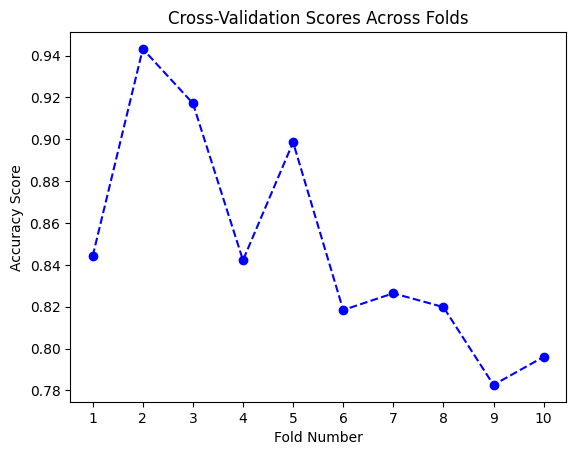

In [57]:
plt.plot(range(1, len(scores)+1), scores, marker='o', linestyle='--', color='b')
plt.xlabel("Fold Number")
plt.ylabel("Accuracy Score")
plt.title("Cross-Validation Scores Across Folds")
plt.xticks(range(1, len(scores)+1))
plt.show()

C:\Users\rutur\AppData\Local\Temp\ipykernel_5324\1751887807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_imp_df, palette="Blues_r")


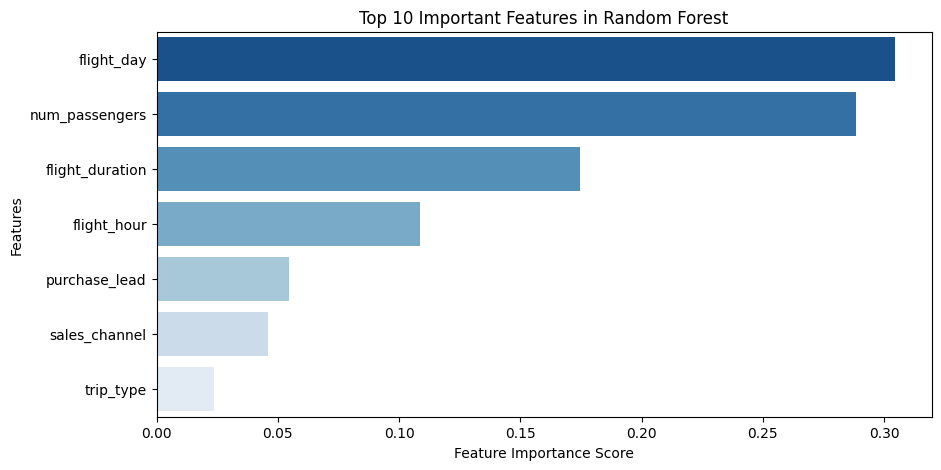

In [58]:
feature_imp_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, x_train.columns), 
                                     reverse=True), 
                              columns=["Importance", "Feature"])


feature_imp_df = feature_imp_df.head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_imp_df, palette="Blues_r")

plt.title("Top 10 Important Features in Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()